# [데이터 전처리/시각화_1회차]


## 오늘의 목표

수업이 끝나면 학생들은 아래를 **직접** 할 수 있어야 한다.

- Pandas를 설치하고(또는 확인하고) 실행 환경에서 불러올 수 있다.
- Series와 DataFrame의 구조 차이를 설명하고 간단히 만들 수 있다.
- dtype(자료형), 결측치(Null/NaN), 컬럼 개념을 이해하고 확인/변환할 수 있다.
- CSV/Excel/JSON 파일을 불러오고 저장할 수 있다.
- (맛보기) 정리한 데이터를 한 번 “그림으로 확인”해 볼 수 있다.

## 데이터 전처리란?

 - 데이터를 보고 현상/문제를 이해하고, 의사결정에 도움이 되는 결론을 만드는 과정

- 현실의 데이터는 거의 지저분함
    -비어있음(결측치), 형식이 제각각, 오타, 날짜 형식, 숫자에 '원'이 붙어 있음
- 전처리는 "분석 가능 상태'로 만드는 작업
    - 전처리 없이 시각화/분석/머신러닝 하면 결과가 틀어지니 에러 발생

## 피처(Feature)
- 분석에 사용하는 열(column)
    - 예: price, qty, order_time, menu 같은 것들이 피처

## 전처리 단계에서 피처 선정 작업들
- 필요 없는 열 제거
- 분석 목표에 맞는 열만 유지
- 파생 피처 만들기 (예: 매출 = 가격 * 수량, 요일 컬럼 생성)

## 실습 준비: 오늘 사용할 "카페 매출" 샘플 데이터 만들기

### Pandas?
엑셀 같은 표 형태의 데이터를 다루는 파이썬 대표 라이브러리
전처리과정에서 제일 많이 사용된다.

In [32]:
# pip install pandas numpy matplotlib seaborn openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Series와 DataFrame 기본 구조 + dtype 이해

In [33]:
raw = [
    {"date": "2026-01-01", "menu": "Americano", "price": "4500원", "qty": "2", "paid": "TRUE"},
    {"date": "2026/01/01", "menu": "Latte",     "price": "5,000",  "qty": 1,   "paid": "True"},
    {"date": "2026-01-02", "menu": "Latte",     "price": None,     "qty": 2,   "paid": "FALSE"},
    {"date": "2026-01-03", "menu": "Mocha",     "price": "5500",   "qty": None,"paid": True},
    {"date": "2026-01-03", "menu": "Americano", "price": "4500",   "qty": 1,   "paid": "TRUE"},
    {"date": "2026-01-04", "menu": "Latte",     "price": "5000원", "qty": "3", "paid": "TRUE"},
    {"date": "2026-01-05", "menu": "Tea",       "price": "4000",   "qty": "1", "paid": "TRUE"},
]
# DataFrame 객체 (테이블 형태의 데이터)
df = pd.DataFrame(raw)
df

,date,menu,price,qty,paid
0,2026-01-01,Americano,4500원,2,TRUE
1,2026/01/01,Latte,"5,000",1,True
2,2026-01-02,Latte,None,2,FALSE
3,2026-01-03,Mocha,5500,None,True
4,2026-01-03,Americano,4500,1,TRUE
5,2026-01-04,Latte,5000원,3,TRUE
6,2026-01-05,Tea,4000,1,TRUE


In [34]:
# Series 객체(단일 열 느낌, 1차원 배열)
s = pd.Series([10, 20, 30], name="score")
s

0    10
1    20
2    30
Name: score, dtype: int64

In [35]:
# 이 데이터프레임이 어떻게 생겼는지 빠르게 보여줌
df.info()
# 행 개수, 열 개수, 각 열의 데이터 타입과 null 값 개수 등을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7 non-null      object
 1   menu    7 non-null      object
 2   price   6 non-null      object
 3   qty     6 non-null      object
 4   paid    7 non-null      object
dtypes: object(5)
memory usage: 408.0+ bytes


In [36]:
# DataFrame 객체 (표)
# 데이터프레임의 앞부분 5행을 보여줌
df.head()

,date,menu,price,qty,paid
0,2026-01-01,Americano,4500원,2,TRUE
1,2026/01/01,Latte,"5,000",1,True
2,2026-01-02,Latte,None,2,FALSE
3,2026-01-03,Mocha,5500,None,True
4,2026-01-03,Americano,4500,1,TRUE


In [37]:
# 데이터프레임의 크기(행, 열) 를 알려줌
df.shape

(7, 5)

In [38]:
# 데이터프레임의 열 이름 목록을 보여줌
df.columns

Index(['date', 'menu', 'price', 'qty', 'paid'], dtype='object')

#### dtype 확인하기

In [39]:
# 각 컬럼의 데이터 타입을 보여줌
df.dtypes

date     object
menu     object
price    object
qty      object
paid     object
dtype: object

In [40]:
# 결측치 확인
# isna() : 값이 비어 있으면 True, 아니면 False
# True를 1로 계산해서 개수 세기
df.isna().sum()

date     0
menu     0
price    1
qty      1
paid     0
dtype: int64

### 문제가 있는 데이터를 분석 가능하게 변환하기 (전처리 핵심)

지저분한 원본 데이터를 계산 가능한 형태로 변환한다 (분석하기 위함)

In [41]:
# (A) 날짜(date)정리 : 통일 → datetime으로 변환
# 문자열 날짜를 계산 가능한 날짜 타입으로 변환, 변환 실패 데이터는 일단 살려두고(NaT) 나중에 처리


# pd.to_datetime(): 날짜 변환 전용 함수
# errors="coerce" : 못 바꾸는 값은 NaT로 변환
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["date"]

0   2026-01-01
1          NaT
2   2026-01-02
3   2026-01-03
4   2026-01-03
5   2026-01-04
6   2026-01-05
Name: date, dtype: datetime64[ns]

In [42]:
# (B) price 정리 문자열 → 숫자: “원”, “,” 제거 후 숫자로 변환

# .astype("string"): 문자열 연산 보장
# .str.replace() : 문자열 전용 메소드
df["price"] = (
    df["price"]
      .astype("string")
      .str.replace("원", "", regex=False)
      .str.replace(",", "", regex=False)
)

# "10,000원" 같은 값은 숫자가 아님
# 문자 제거 → 숫자만 남김

# pd.to_numeric(): 숫자 변환 전용 함수
# errors="coerce" : 못 바꾸는 값은 NaN로 변환
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["price"]

0    4500
1    5000
2    <NA>
3    5500
4    4500
5    5000
6    4000
Name: price, dtype: Int64

In [43]:
# (C) qty 정리: 숫자로 변환
# 수량은 숫자여야 계산 가능, 이상한 값은 NaN 처리

# pd.to_numeric(): 숫자 변환 전용 함수
# errors="coerce" : 못 바꾸는 값은 NaN로 변환
df["qty"] = pd.to_numeric(df["qty"], errors="coerce")
df["qty"]

0    2.0
1    1.0
2    2.0
3    NaN
4    1.0
5    3.0
6    1.0
Name: qty, dtype: float64

In [44]:
# (D) paid 정리: TRUE/FALSE/True 혼합 → bool로 통일
# "TRUE", "True", "false" 혼재 → 통일
# 문자열 → bool 타입

# .astype("string"): 문자열 연산 보장
# .str.upper(): 대문자로 변환
df["paid"] = df["paid"].astype("string").str.upper()
df["paid"] = df["paid"].map({"TRUE": True, "FALSE": False})
df["paid"]


0     True
1     True
2    False
3     True
4     True
5     True
6     True
Name: paid, dtype: bool

In [45]:
# (E) 결측치 처리(오늘은 가장 간단한 방식)
# 가격/수량 없으면 매출 계산 불가, 연습 목적이므로 0으로 처리


# price나 qty가 없으면 매출 계산이 안 되니 “0으로 채운다” (연습용)

# df[[컬럼1, 컬럼2]] : 여러 컬럼 선택
# .fillna(0) : 결측치 채우기
df[["price", "qty"]] = df[["price", "qty"]].fillna(0)
df.isna().sum()

date     1
menu     0
price    0
qty      0
paid     0
dtype: int64

In [46]:
# (F) 파생 피처 만들기: sales(매출) = price * qty
# 원본 컬럼을 조합해 새로운 의미의 변수 생성, 분석에서 제일 중요한 단계


# 컬럼 간 연산 → 행 단위 자동 계산
df["sales"] = df["price"] * df["qty"]
df

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2.0,True,9000.0
1,NaT,Latte,5000,1.0,True,5000.0
2,2026-01-02,Latte,0,2.0,False,0.0
3,2026-01-03,Mocha,5500,0.0,True,0.0
4,2026-01-03,Americano,4500,1.0,True,4500.0
5,2026-01-04,Latte,5000,3.0,True,15000.0
6,2026-01-05,Tea,4000,1.0,True,4000.0


##### date에 NaT가 1개 있음
- NaT는 “날짜 변환 실패/결측”이라는 뜻, 원본 데이터에서 날짜가 한 행만 파싱이 안 된 상태.


In [47]:
# 확인 방법
df[df["date"].isna()]


,date,menu,price,qty,paid,sales
1,NaT,Latte,5000,1.0,True,5000.0


- 여기서 해당 행의 원본 date 값이 공백이 섞였거나(예: "2026/01/01 "), 이상한 문자열이면 NaT가 될 수 있다.

- 그게 아니라면 판다스 2.X 버전에서 한가지 날짜 포멧이 여러가지 섞여 있을대 coerce 처리 해버리는 현상 때문

    - 처음 데이터 프레임 만드는 부분부터 다시 실행하고 아래 코드 실행하면 date의 NaT가 사라짐


In [48]:
#df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["date"] = pd.to_datetime(df["date"], errors="coerce", format="mixed")
df["date"] = df["date"].fillna("2026-01-01") # 끝가지 변환 안되서 강제로 변환
df["date"]

0   2026-01-01
1   2026-01-01
2   2026-01-02
3   2026-01-03
4   2026-01-03
5   2026-01-04
6   2026-01-05
Name: date, dtype: datetime64[ns]

아래 부분을 이어서 전부 차례대로 다시 실행하면

In [49]:
df["sales"] = df["price"] * df["qty"]
df

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2.0,True,9000.0
1,2026-01-01,Latte,5000,1.0,True,5000.0
2,2026-01-02,Latte,0,2.0,False,0.0
3,2026-01-03,Mocha,5500,0.0,True,0.0
4,2026-01-03,Americano,4500,1.0,True,4500.0
5,2026-01-04,Latte,5000,3.0,True,15000.0
6,2026-01-05,Tea,4000,1.0,True,4000.0


참고로, '2026/01/01' 자체는 to_datetime이 보통 잘 읽습니다. 그래서 NaT가 나왔다는 건 공백/특수문자 등 “미세한 오염”일 가능성이 높다.

## 시각화 맛보기

<Axes: xlabel='menu'>

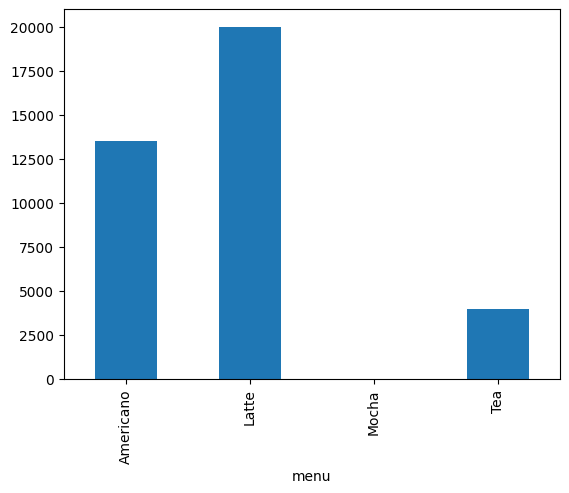

In [50]:
df.groupby("menu")["sales"].sum().plot(kind="bar")


## 3. 데이터 불러오기 및 저장 (CSV, Excel. JSON)

### CSV 읽기 쓰기

In [51]:
# 저장
df.to_csv("cafe_sales_clean.csv", index=False, encoding="utf-8-sig")

In [52]:
# 읽기
df_csv = pd.read_csv("cafe_sales_clean.csv")
df_csv.head(10)

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2.0,True,9000.0
1,2026-01-01,Latte,5000,1.0,True,5000.0
2,2026-01-02,Latte,0,2.0,False,0.0
3,2026-01-03,Mocha,5500,0.0,True,0.0
4,2026-01-03,Americano,4500,1.0,True,4500.0
5,2026-01-04,Latte,5000,3.0,True,15000.0
6,2026-01-05,Tea,4000,1.0,True,4000.0


### Excel 읽기 쓰기

In [53]:
# 저장
df.to_excel("cafe_sales_clean.xlsx", index=False)


In [54]:
# 읽기
df_xlsx = pd.read_excel("cafe_sales_clean.xlsx")
df_xlsx.head()


,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2,True,9000
1,2026-01-01,Latte,5000,1,True,5000
2,2026-01-02,Latte,0,2,False,0
3,2026-01-03,Mocha,5500,0,True,0
4,2026-01-03,Americano,4500,1,True,4500


### JSON 읽기 쓰기

In [55]:
# 저장
df.to_json("cafe_sales_clean.json", orient="records", force_ascii=False, indent=2)

In [56]:
# 읽기
df_json = pd.read_json("cafe_sales_clean.json")
df_json.head()

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2,True,9000
1,2026-01-01,Latte,5000,1,True,5000
2,2026-01-02,Latte,0,2,False,0
3,2026-01-03,Mocha,5500,0,True,0
4,2026-01-03,Americano,4500,1,True,4500


## 수업 마무리 미션

### 미션 1(필수)
- menu별로 총 매출(sales)을 구해서 출력해보기

In [57]:
df.groupby("menu")["sales"].sum()

menu
Americano    13500.0
Latte        20000.0
Mocha            0.0
Tea           4000.0
Name: sales, dtype: Float64

#### 정답
- 아메리카노: 13500원
- 라떼: 20000원
- 모카:     0원
- 티:    4000원            

### 미션 2 (필수)
- paid == True인 주문만 골라서 CSV로 저장하기

In [58]:
paid_df = df[df["paid"] == True]
paid_df.to_csv("cafe_sales_paid_only.csv", index=False, encoding="utf-8-sig")

### 미션 3 (도전)
- date에서 요일 컬럼 만들기

In [59]:
df["weekday"] = df["date"].dt.day_name()
df[["date", "weekday"]].head()

,date,weekday
0,2026-01-01,Thursday
1,2026-01-01,Thursday
2,2026-01-02,Friday
3,2026-01-03,Saturday
4,2026-01-03,Saturday


## 마지막 팁!
- 핵심은 "왜 이 코드가 사용되었나? 왜 이렇게 작동되는가?" 연결해 생각하기
- dtype 통일하면
    - 계산/정렬/필터가 가능해짐
결측치 처리
    - 분석을 멈추지 않기 위해, 오류가 발생하지 않기위해
- 파일 저장
    - 작업물의 협업/공유가 가능해짐
- 초보자가가 가장 많이 막히는 포인트
    - to_datetime, to_numeric에서 errors="coerce" 의미
        - errors="coerce" → 못 바꾸면 NaN로 버꿔라
    - 문자열 정리(str.replace) 후 숫자 변환 순서
        - 10,000원 같은 값이 있으면 바로 에러
        - 문자열 정리 → 숫자 변환 순서 절대 바꾸지 말기
        - 
    - Excel 저장 시 openpyxl 설치 누락

